# Selección de la ubicación del pozo

Digamos que trabajas para una compañía minera "GlavRosGosNeft". Tenemos que decidir dónde perforar un nuevo pozo.

Se le han dado muestras de petróleo en tres regiones, cada 10.000 campos, donde se ha medido la calidad del petróleo y la cantidad de sus reservas. Cree un modelo de aprendizaje automático que le ayudará a identificar la región donde su minería obtendrá el mayor beneficio. Analizar los posibles beneficios y riesgos de la técnica *Bootstrap.*

Pasos para seleccionar una ubicación:

- En la región seleccionada están buscando depósitos, para cada determinar los valores de los rasgos;
- elaborar un modelo y estimar el importe de las reservas;
- Seleccionar los depósitos con las estimaciones de valor más altas. El número de campos depende del presupuesto de la empresa y el costo de desarrollo de un pozo;
- El beneficio es igual al beneficio total de los campos seleccionados.

## Descargar y preparar los datos

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df_0.info()

df_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df_1.info()

df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
df_2.info()

df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
df_0.duplicated().sum()

0

In [7]:
df_1.duplicated().sum()

0

In [8]:
df_2.duplicated().sum()

0

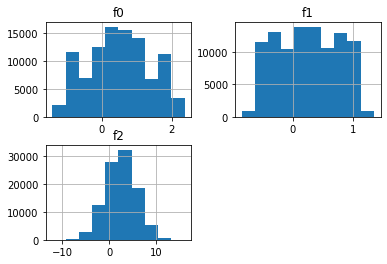

In [9]:
df_0[["f0","f1","f2"]].hist()
plt.show()

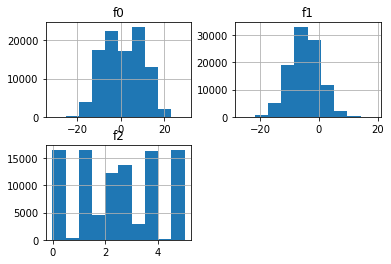

In [10]:
df_1[["f0","f1","f2"]].hist()
plt.show()

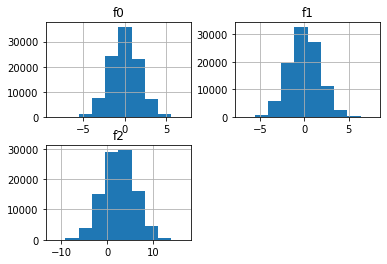

In [11]:
df_2[["f0","f1","f2"]].hist()
plt.show()

No hay emisiones fuertes - se puede empezar a aprender.

## Aprendizaje y validación de modelos

Escribe una función para el entrenamiento de modelos.

In [12]:
def model(df):
    target = df['product'] 
    features = df.drop(['product', 'id'], axis=1) 
    features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, test_size=0.25, random_state=12345) 
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    predicted_valid_mean = predicted_valid.sum()/len(predicted_valid) 
    
    return target_valid, predicted_valid, rmse, predicted_valid_mean

Ahora obtenemos resultados para cada región:

In [13]:
target_valid_0, predicted_valid_0, rmse_0, predicted_valid_mean_0 = model(df_0)
target_valid_1, predicted_valid_1, rmse_1, predicted_valid_mean_1 = model(df_1)
target_valid_2, predicted_valid_2, rmse_2, predicted_valid_mean_2 = model(df_2)

print('Ср. запас сырья в регионе 0:', predicted_valid_mean_0, 'rmse:', rmse_0)
print('Ср. запас сырья в регионе 1:', predicted_valid_mean_1, 'rmse:', rmse_1)
print('Ср. запас сырья в регионе 2:', predicted_valid_mean_2, 'rmse:', rmse_2)

Ср. запас сырья в регионе 0: 92.59256778438035 rmse: 37.5794217150813
Ср. запас сырья в регионе 1: 68.728546895446 rmse: 0.893099286775617
Ср. запас сырья в регионе 2: 94.96504596800489 rmse: 40.02970873393434


El modelo predijo mejor en la región 1 (error rmse debajo - 0.89).  
Sin embargo, se prevé que la reserva media de materias primas en las regiones 0 y 2 será mucho mayor.  
Veamos las ganancias y los riesgos.

## Preparación para ganancias

### Guarde todos los valores clave para los cálculos en variables separadas.

In [14]:
budget = 10*10**9
chosen_points = 500
best_points = 200
price_per_barrel = 450
barrel_income_rub = 450 * 10**3
loss_probability = 2.5

### Calcular una cantidad suficiente de materia prima para un desarrollo de equilibrio de un nuevo pozo. Comparar el volumen resultante de materia prima con el stock medio de cada región.

In [15]:
min_volume = budget / best_points / barrel_income_rub
print(f'Достаточный объём сырья для безубыточной разработки новой скважины равен {round(min_volume, 3)} тыс. баррелей)')

Достаточный объём сырья для безубыточной разработки новой скважины равен 111.111 тыс. баррелей)


In [16]:
print('Средняя расчетная прибыль региона 0',\
      best_points *\
      predicted_valid_mean_0 *\
     barrel_income_rub\
     - budget)
print('Средняя расчетная прибыль региона 1',\
      best_points *\
      predicted_valid_mean_1 *\
     barrel_income_rub\
     - budget)
print('Средняя расчетная прибыль региона 2',\
      best_points *\
      predicted_valid_mean_2 *\
     barrel_income_rub\
     - budget)

Средняя расчетная прибыль региона 0 -1666668899.4057684
Средняя расчетная прибыль региона 1 -3814430779.4098606
Средняя расчетная прибыль региона 2 -1453145862.8795605


En las tres regiones, el stock medio de materias primas es inferior al punto de equilibrio, pero especialmente en la región 1.

## Función para el cálculo de beneficios

Vamos a escribir una función para calcular el beneficio por pozos seleccionados y predicciones modelo.

* elegir pozos con valores máximos de predicción
* Resumamos la cantidad objetivo de materias primas correspondiente a estas predicciones.
* calcular el beneficio por el volumen recibido de materia prima

Llevemos los valores objetivo y predictivo al mismo tipo. Para esto escribimos una función.

In [17]:
def series_type(target, pred):
    target = target.reset_index(drop=True)
    pred = pd.Series(pred)
    return target, pred

In [18]:
target_valid_0, predicted_valid_0 = series_type(target_valid_0, predicted_valid_0)
target_valid_1, predicted_valid_1 = series_type(target_valid_1, predicted_valid_1)
target_valid_2, predicted_valid_2 = series_type(target_valid_2, predicted_valid_2)

In [19]:
# función de cálculo de beneficios (ingresos reales de los mejores 200 pozos, menos la inversión)

def tot_income(target, probabilities, count, barrel_income_rub, budget):
    prob_sort = probabilities.sort_values(ascending=False)
    selected = target[prob_sort.index][:count]
    return int(barrel_income_rub * selected.sum() - budget)

## Cálculo de beneficios y riesgos 

* Utilice la técnica Bootstrap con 1000 muestras para encontrar la distribución de beneficios.
* Encuentre un beneficio promedio, un intervalo de confianza del 95% y un riesgo de pérdidas. La pérdida es un beneficio negativo.

In [20]:
# función de obtención de parámetros básicos de cálculo mediante bootstrap

def bootstrap(target, predicted, best_points, barrel_income_rub, budget):
    state = RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n = chosen_points, replace=True, random_state=state)
        pred_subsumple = predicted[target_subsample.index]
        values.append(tot_income(target_subsample.reset_index(drop=True), pred_subsumple.reset_index(drop=True), best_points, barrel_income_rub, budget))
    values = pd.Series(values)
    values_mean = int(values.mean())
    lower = int(values.quantile(q=0.025))
    upper = int(values.quantile(q=0.975))
    risk = int(len(values[values < 0]) / len(values) * 100)
    return values_mean, lower, upper, risk

Calcule los parámetros básicos para tres regiones:

In [21]:
values_mean_0, lower_0, upper_0, risk_0  = bootstrap(target_valid_0, predicted_valid_0, best_points, barrel_income_rub, budget)
values_mean_1, lower_1, upper_1, risk_1  = bootstrap(target_valid_1, predicted_valid_1, best_points, barrel_income_rub, budget)
values_mean_2, lower_2, upper_2, risk_2  = bootstrap(target_valid_2, predicted_valid_2, best_points, barrel_income_rub, budget)

print('Средняя прибыль лучших месторождений региона 0 равна', values_mean_0)
print('Средняя прибыль лучших месторождений региона 1 равна', values_mean_1)
print('Средняя прибыль лучших месторождений региона 2 равна', values_mean_2)

Средняя прибыль лучших месторождений региона 0 равна 396164984
Средняя прибыль лучших месторождений региона 1 равна 456045105
Средняя прибыль лучших месторождений региона 2 равна 404403866


In [22]:
print('95% доверительный интервал для средней прибыли 200 лучших месторождений региона 0:', lower_0, upper_0)
print('95% доверительный интервал для средней прибыли 200 лучших месторождений региона 1:', lower_1, upper_1)
print('95% доверительный интервал для средней прибыли 200 лучших месторождений региона 2:', lower_2, upper_2)

95% доверительный интервал для средней прибыли 200 лучших месторождений региона 0: -111215545 909766941
95% доверительный интервал для средней прибыли 200 лучших месторождений региона 1: 33820509 852289452
95% доверительный интервал для средней прибыли 200 лучших месторождений региона 2: -163350412 950359574


In [23]:
print('Риск убытков региона 0 равен', risk_0, '%')
print('Риск убытков региона 1 равен', risk_1, '%')
print('Риск убытков региона 2 равен', risk_2, '%')

Риск убытков региона 0 равен 6 %
Риск убытков региона 1 равен 1 %
Риск убытков региона 2 равен 7 %


## Conclusiones

En el curso de este experimento, descargamos y preparamos datos para tres regiones, enseñamos un modelo de regresión lineal e investigamos la infiltración de pozos.

Volumen suficiente de materia prima para la extracción de equilibrio - 111.11 mil barriles. El Ministerio de Defensa de Rusia ha lanzado un nuevo proyecto.  
La población media en cada una de las tres regiones parecía menor.

Después de usar Bootstrap con 1000 muestras se obtuvieron los siguientes datos:  
El beneficio promedio de los mejores depósitos de la región 0 es 396164984 rublos.  
El beneficio promedio de los mejores depósitos de la región 1 es 456045105 rublos.  
El beneficio promedio de los mejores depósitos de la región 2 es 4.0440.866 rublos.

Intervalo de confianza del 95% para el beneficio promedio de los 200 principales depósitos de la región 0: -111215545 909766941  
Intervalo de confianza del 95% para el beneficio promedio de los 200 mayores depósitos de la región 1: 33820509 852289452  
Intervalo de confianza del 95% para el beneficio promedio de los 200 mejores depósitos de la región 2: -163350412 950359574  

El riesgo de la región 0 es del 6  
El riesgo de la región 1 equivale al 1  
El riesgo de la región 2 es del 7  

Sobre la base de los resultados, la región 1 se convirtió en la más atractiva para el desarrollo. Aquí, el beneficio promedio más alto, un marco más estrecho de intervalo de confianza y el menor riesgo de pérdida.